<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/13_tf_obj_2/Train_Infer_Optimize_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
 - Select the right file and run
 
     - chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/13_tf_obj_2/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/13_tf_obj_2/installation && chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
# Check TF version
import tensorflow as tf
print(tf.__version__)

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v2_320
2. Model Name: ssd_mobilenet_v1_fpn_640
3. Model Name: ssd_mobilenet_v2_fpnlite_320
4. Model Name: ssd_mobilenet_v2_fpnlite_640
5. Model Name: ssd_resnet50_v1_fpn_320
6. Model Name: ssd_resnet50_v1_fpn_640
7. Model Name: ssd_resnet101_v1_fpn_320
8. Model Name: ssd_resnet101_v1_fpn_640
9. Model Name: ssd_resnet152_v1_fpn_320
10. Model Name: ssd_resnet152_v1_fpn_640
11. Model Name: faster_rcnn_resnet50_v1_640
12. Model Name: faster_rcnn_resnet50_v1_1024
13. Model Name: faster_rcnn_resnet101_v1_640
14. Model Name: faster_rcnn_resnet101_v1_1024
15. Model Name: faster_rcnn_resnet152_v1_640
16. Model Name: faster_rcnn_resnet152_v1_1024
17. Model Name: faster_rcnn_inception_resnet_v2_640
18. Model Name: faster_rcnn_inception_resnet_v2_1024
19. Model Name: efficientdet_d0
20. Model Name: efficientdet_d1
21. Model Name: efficientdet_d2
22. Model Name: efficientdet_d3
23. Model Name: efficientdet_d4
24. Model Name: efficientdet_d5
25. Model Name: efficientdet_

# Sample Dataset
  - Credits: https://www.tejashwi.io/object-detection-with-fizyr-retinanet/

In [5]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

## Dataset required - in Pascal VOC format

    parent_dir
        |
        |---------train
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)
        |
        |---------validation
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)

In [5]:
train_img_dir = "ship/images/Train";
train_anno_dir = "ship/voc/";
class_list_file = "ship/classes.txt";

gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=24)
gtf.set_val_dataset(train_img_dir, train_anno_dir)

In [6]:
# Create tf record

In [7]:
gtf.create_tfrecord(data_output_dir="data_tfrecord")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.


In [8]:
# Model and hyper params

In [ ]:
gtf.set_model_params(model_name="ssd_mobilenet_v2_320")

In [10]:
gtf.set_hyper_params(num_train_steps=10000, lr=0.01)

In [11]:
# Directory to store inference graph

In [12]:
gtf.export_params(output_directory="export_dir");

In [1]:
# (Optional) Optimize using TensorRT - Feature Not tested on colab
# Available conversion types
# - FP32
# - FP16
# - INT8 (Use int8 type only when your deployment and development platforms are similar. Else rebuild on deployment platform)

In [14]:
gtf.TensorRT_Optimization_Params(conversion_type="FP16", trt_dir="trt_fp16_int")

In [15]:
# training
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/13_tf_obj_2/lib/train.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/train.py

In [ ]:
# exportaing trained model
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/13_tf_obj_2/lib/export.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/export.py

In [ ]:
# Optimizing For TensorRT - Feature Not tested on colab
# This requires TensorRT 6.0.1 to be installed
# Go to https://developer.nvidia.com/tensorrt
# Download 
#  - nv-tensorrt-repo-ubuntu1804-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu18.04)
#  - nv-tensorrt-repo-ubuntu1604-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu16.04)
# Run the following commands to install trt (in a terminal)
# $ sudo dpkg -i nv-tensorrt-repo-ubuntu1804-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb
# $ sudo apt-key add /var/nv-tensorrt-repo-cuda10.1-trt6.0.1.5-ga-20190913/7fa2af80.pub
# $ sudo apt-get update
# $ sudo apt-get install tensorrt
# $ sudo apt-get install uff-converter-tf
# $ sudo apt-get install python3-libnvinfer-dev

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/optimize.py

# Inference on exported model (Unoptimized) 

 - Runs on everything except Jetson Nano Board

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.set_model_params(exported_model_dir = 'export_dir')

In [5]:
ls ship/test

img1.jpg  img2.jpg  img3.jpg  img4.jpg  img5.jpg  img6.jpg


Image loading and preproc time - 0.02509307861328125
Inference time - 2.5066401958465576
Extracting results and priting on image time - 0.04370546340942383


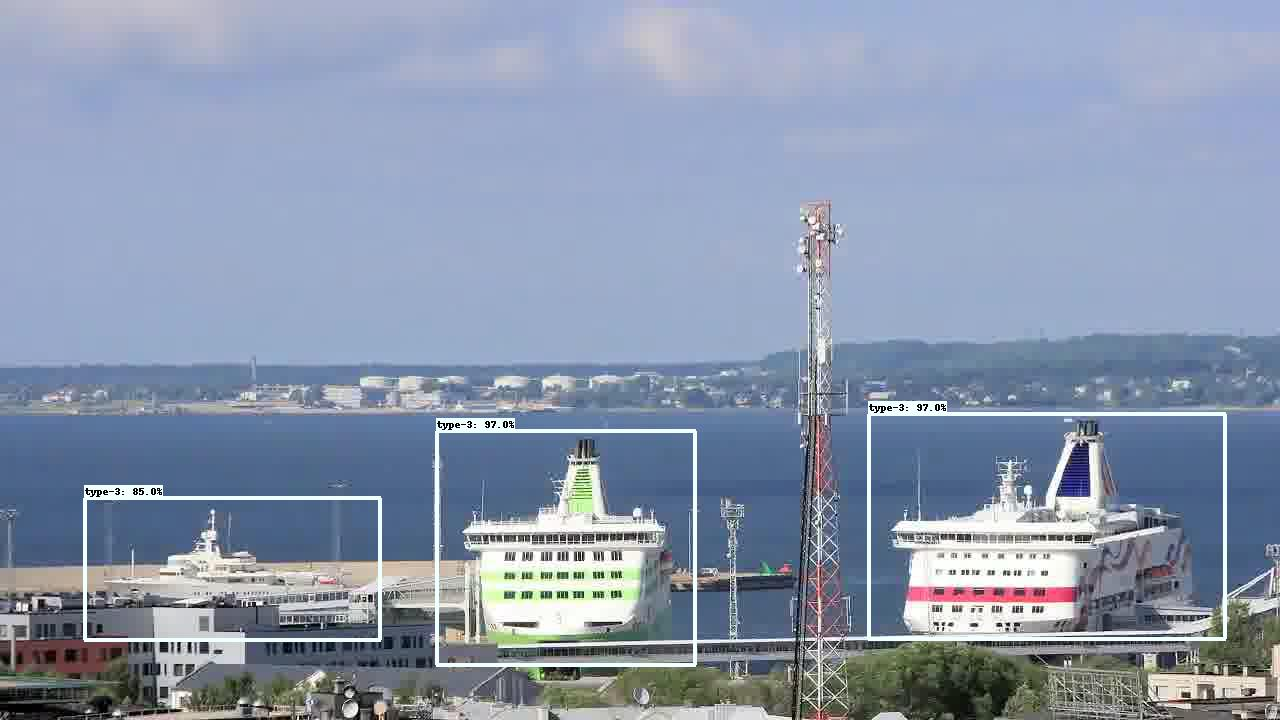

In [6]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

Image loading and preproc time - 0.012728691101074219
Inference time - 0.010691404342651367
Extracting results and priting on image time - 0.03818058967590332


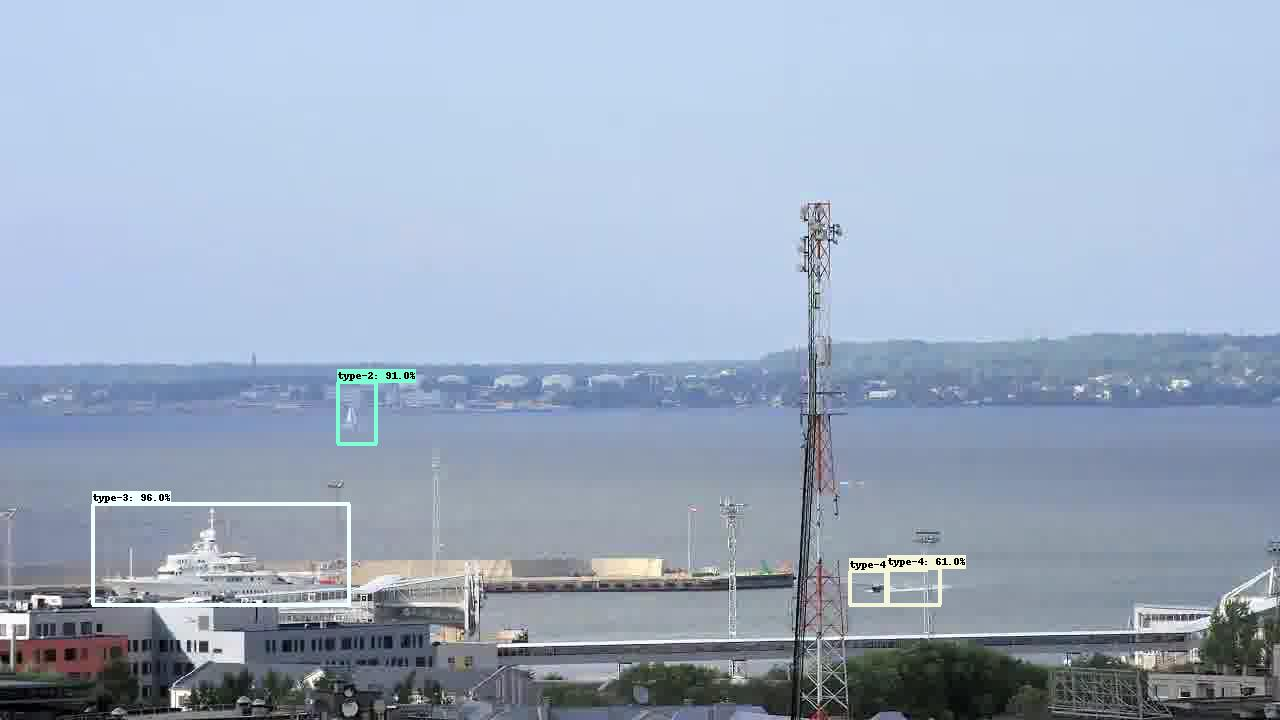

In [8]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

In [9]:
gtf.benchmark_for_speed('ship/test/img1.jpg')

Average Image loading time: 0.011052303314208985
Average Inference time: 0.009794979095458985
Result extraction time: 0.0352832293510437
total_time = 0.9794979095458984
images_per_sec = 102
99th_percentile = 10.67209243774414
latency_mean  = 9.794979095458984
latency_median = 9.709596633911133
latency_min = 9.123802185058594


# Inference on TensorRT optimized model 

 - Runs on everything except Jetson Nano Board

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.set_model_params(exported_model_dir = 'trt_fp16_dir')

In [5]:
ls ship/test

img1.jpg  img2.jpg  img3.jpg  img4.jpg  img5.jpg  img6.jpg


In [6]:
# Running for the first time builds the tensorRT engine for the model based on the plan saved in trt_fp16_dir folder

Image loading and preproc time - 0.024590253829956055
Inference time - 34.80273151397705
Extracting results and priting on image time - 0.03899192810058594


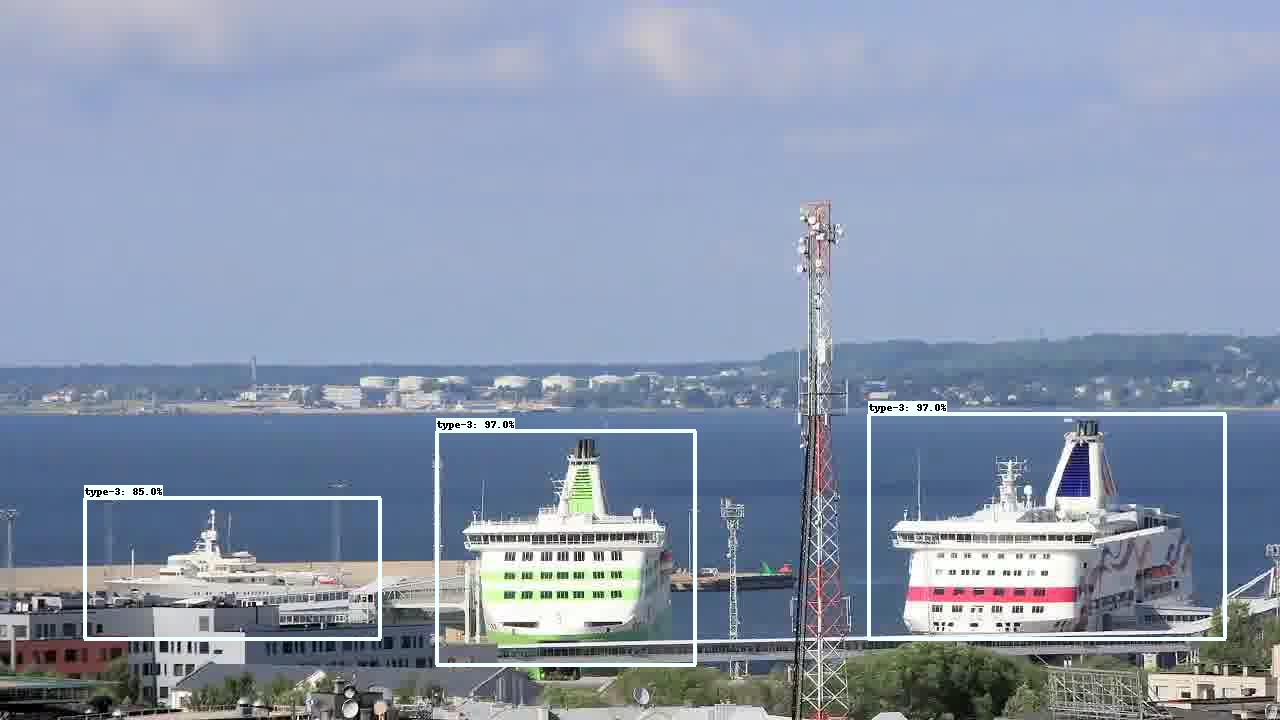

In [7]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

Image loading and preproc time - 0.012178897857666016
Inference time - 0.006511211395263672
Extracting results and priting on image time - 0.03793501853942871


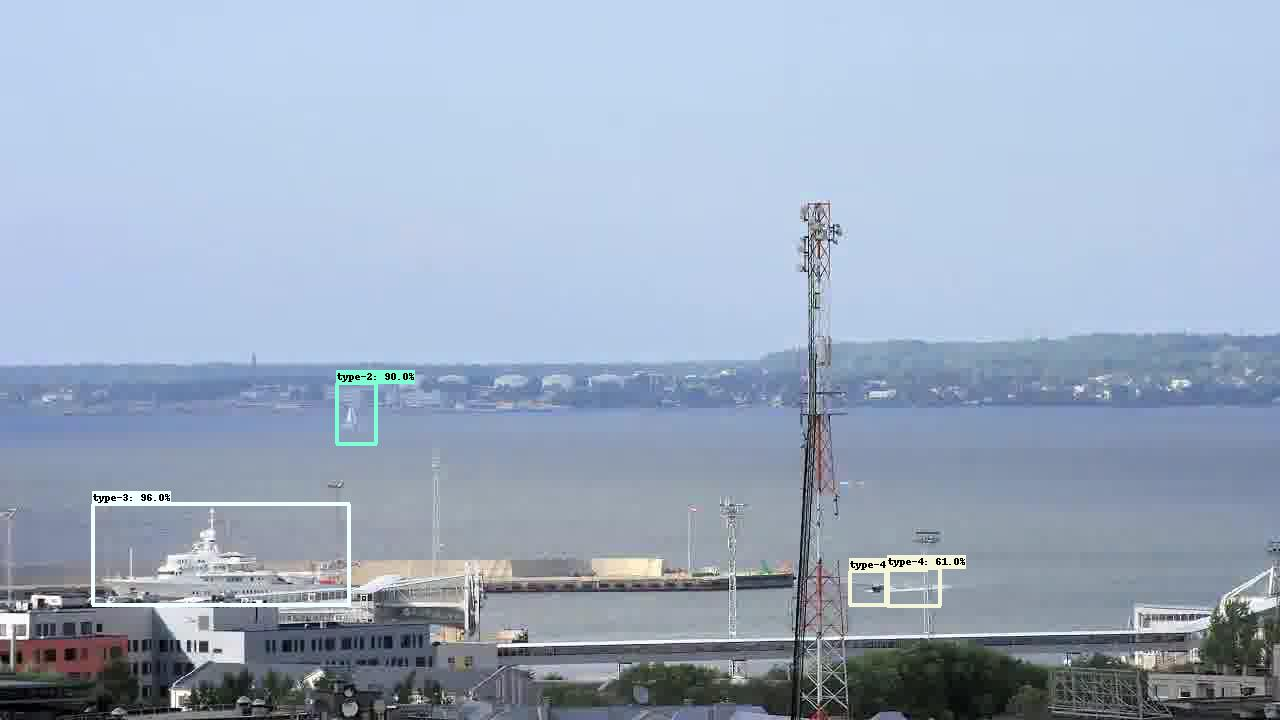

In [8]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

In [9]:
gtf.benchmark_for_speed('ship/test/img1.jpg')

Average Image loading time: 0.010869770050048829
Average Inference time: 0.006242232322692871
Result extraction time: 0.03500136137008667
total_time = 0.6242232322692871
images_per_sec = 160
99th_percentile = 6.540536880493164
latency_mean  = 6.242232322692871
latency_median = 6.2302350997924805
latency_min = 5.94019889831543


# Setup your Jetson Nano Board

 - Step 1: Download Jetpack 4.3 SD Card Image https://developer.nvidia.com/jetpack-43-archive
 
 - Step 2: Write this image on SD Card. You may use https://www.balena.io/etcher/
 
 - Step 3: Attach your SD Ccard to Nano board and boot the system, and complete the installation steps

# Install all the pre-requisite libraries

Run these commands in the terminal


### Update apt
 - sudo apt-get update
 - sudo apt-get upgrade


### Install nano writer
 - sudo apt-get install nano

 
### Install libraries required by OpenCV and Tensorflow
 - sudo apt-get install git cmake libatlas-base-dev gfortran libhdf5-serial-dev hdf5-tools nano locate libfreetype6-dev python3-setuptools protobuf-compiler libprotobuf-dev openssl libssl-dev libcurl4-openssl-dev cython3 libxml2-dev libxslt1-dev python3-pip
 - sudo apt-get install libopenblas-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev 


### Install python 3 pip 
 - sudo pip3 install virtualenv virtualenvwrapper


### Add the following file to .bashrc
 - export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3
 - export WORKON_HOME=$HOME/.virtualenvs
 - export VIRTUALENVWRAPPER_VIRTUALENV=/usr/local/bin/virtualenv
 - source /usr/local/bin/virtualenvwrapper.sh


### After adding run
 - source ~/.bashrc


### Install Cmake 
 - wget https://github.com/Kitware/CMake/releases/download/v3.18.1/cmake-3.18.1.tar.gz
 - tar -xvzf cmake-3.18.1.tar.gz
 - cd cmake-3.18.1 && cmake . && make -j3
 - sudo make install


### Install further libraries 
 - sudo apt install -y libjpeg-dev libpng-dev libtiff-dev libavcodec-dev libavformat-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev v4l-utils qv4l2 v4l2ucp libdc1394-22-dev libffi-dev libgtk-3-dev libatlas-base-dev gfortran


### Add to ~/.bashrc
 - export PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
 
 - export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64\
                         ${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
 

### After adding run
 - source ~/.bashrc


### Create a Virtual-Environment
 - mkvirtualenv -p /usr/bin/python3.6 tf_test1


### Install all necessary python packages
 - pip install numpy==1.19.1
 - pip install scipy==1.5.1
 - pip install scikit-build protobuf cython -vvvv
 - pip install grpcio absl-py py-cpuinfo psutil portpicker six mock requests gast h5py astor termcolor protobuf keras-applications keras-preprocessing wrapt google-pasta -vvvv
 -pip install https://developer.download.nvidia.com/compute/redist/jp/v43/tensorflow-gpu/tensorflow_gpu-2.0.0+nv19.12-cp36-cp36m-linux_aarch64.whl -vvvv
 - pip install pandas pillow -vvvv


### Install OpenCV
 - mkdir opencv && cd opencv
 - wget -O opencv.zip https://github.com/opencv/opencv/archive/4.1.2.zip
 - unzip opencv.zip
 - mv opencv-4.1.2 opencv
 - cd opencv && mkdir build && cd build
 - cmake -D CMAKE_BUILD_TYPE=RELEASE -D WITH_CUDA=OFF -D WITH_CUBLAS=OFF -D WITH_LIBV4L=ON -D BUILD_opencv_python3=ON -D BUILD_opencv_python2=OFF -D BUILD_opencv_java=OFF -D WITH_GSTREAMER=ON -D WITH_GTK=ON -D BUILD_TESTS=OFF -D BUILD_PERF_TESTS=OFF -D BUILD_EXAMPLES=OFF -D OPENCV_ENABLE_NONFREE=OFF ..
 - make -j3
 - sudo make install
 - cd ~/.virtualenvs/tf_test1/lib/python3.6/site-packages
 - ln -s /usr/local/lib/python3.6/site-packages/cv2/python-3.6/cv2.cpython-36m-aarch64-linux-gnu.so cv2.so


### Clone Monk_Object Detection library
 - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git



#### Note: Don't run installation for 13_tf_obj_2. The inference code has been made in a way that it doesn't need object detection api tools





In [ ]:
# Copy Sample dataset 

In [ ]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

# Inference on Nano board (To Run only on Jetson Nano Board)

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [ ]:
from infer_detector_nano import Infer

In [ ]:
gtf = Infer();

In [ ]:
# Model loading takes time on nano boards

In [ ]:
gtf.set_model_params(exported_model_dir = 'trt_fp16_dir')

In [ ]:
ls ship/test

In [ ]:
# Running for the first time builds the tensorRT engine for the model based on the plan saved in trt_fp16_dir folder

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1); 

In [ ]:
# Oputput will be saved as output.jpg
gtf.draw_on_image(self, bbox_thickness=3, text_size=1, text_thickness=2)

In [ ]:
gtf.benchmark_for_speed('ship/test/img1.jpg')